In [1]:
import numpy as np
import pandas as pd
from sklearn import svm
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("Files/gender.csv")

In [3]:
data.head()

,Height,Hair length,Gender
0,151,99,F
1,193,8,M
2,150,123,F
3,176,0,M
4,188,11,M


In [4]:
data.shape

(200, 3)

In [5]:
data.isnull().sum()

Height         0
Hair length    0
Gender         0
dtype: int64

In [6]:
data['Class'] = data['Gender'].apply(lambda x: 'r' if x == 'F' else 'b')

In [7]:
data.head()

,Height,Hair length,Gender,Class
0,151,99,F,r
1,193,8,M,b
2,150,123,F,r
3,176,0,M,b
4,188,11,M,b


In [8]:
data.describe()

,Height,Hair length
count,200.000000,200.00000
mean,171.140000,40.87000
std,15.259906,41.51688
min,144.000000,0.00000
25%,158.000000,6.00000
50%,168.500000,17.50000
75%,183.000000,68.50000
max,204.000000,143.00000


In [9]:
fig, ax = plt.subplots()
ax.scatter(x=data['Height'], y=data['Hair length'], c=data['Class'])

In [10]:
X = data[['Height', 'Hair length']]
y = data['Gender']
y = np.array([0 if gender == 'M' else 1 for gender in y])

In [11]:
clf = svm.SVC(kernel='linear')
clf.fit(X, y)

SVC(kernel='linear')

In [12]:
X_test = np.random.rand(10000,2)
X_test = X_test*(80, 150) + (130, 0)
y_pred = clf.predict(X_test)
X_test

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


array([[190.7478456 ,  60.62493007],
       [150.36402385, 112.14601783],
       [205.99147547,  98.77730849],
       ...,
       [144.75583713,  66.40335609],
       [177.58380329,  31.17186642],
       [132.35762369, 116.85869398]])

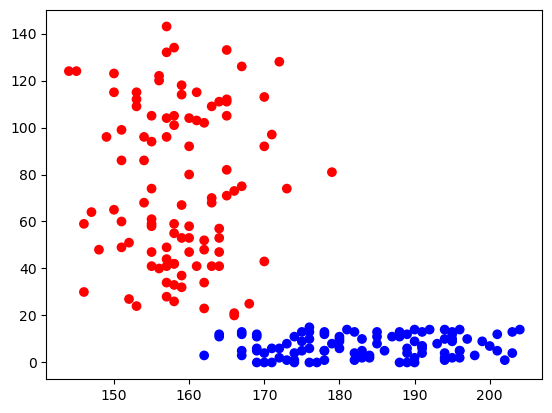

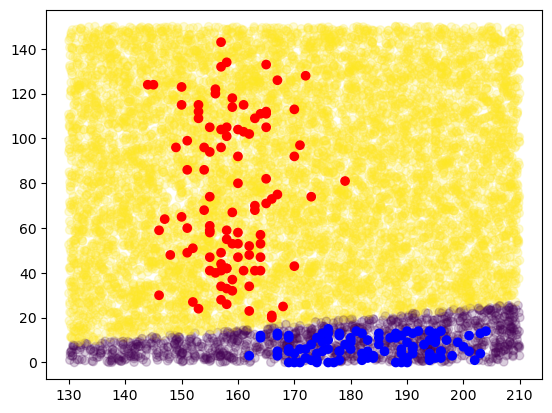

In [13]:
fig, ax = plt.subplots()
ax.scatter(x=X_test[:,0], y=X_test[:,1], c=y_pred, alpha=.2)
ax.scatter(x=data['Height'], y=data['Hair length'], c=data['Class'])
plt.show()